In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.integrate import quad

In [2]:
X = pd.read_csv("parental_anxiety_vs_kids_age.csv").to_numpy()

1) Use KDE to find p(x)

In [3]:
def gaussian(mean, var, x):
    return np.exp(-0.5 * ((x - mean) / var)**2) / (var * np.sqrt(2*math.pi))

/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_67365/2444859084.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)


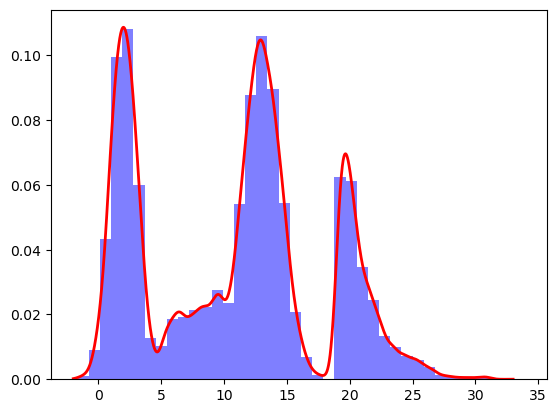

In [4]:
n, bins, patches = plt.hist(X, 40, facecolor='blue', alpha=0.5, density=True)
def compute_KDE(X,x):
    ind_start = 0
    ind_current = 1
    overall_pdf = 0
    num_gaussians = 0
    complete_pdf  = 0
    for i in range(X.shape[0]):
        subset_X = X[ind_start:ind_current]
        if subset_X.size == 0:
            break
        else: 
            mu = float(subset_X)
            sigma = 0.4
            pdf = (gaussian(mu, sigma, x))
            num_gaussians += 1
            overall_pdf += pdf
            ind_start = ind_current
            ind_current += 1
    complete_pdf = overall_pdf / num_gaussians
    return complete_pdf


x = np.linspace(-2, 33, 10000)
plt.plot(x, compute_KDE(X,x), 'r-', linewidth = 2)
plt.show()

# Polynomial Regression Closed Form Method

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
sampled_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_sample = X[sampled_indices]

In [7]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_sample)
y = compute_KDE(X_sample, np.linspace(-2, 33, 1000))
w_poly = np.linalg.inv(np.dot(X_poly.T,X_poly)).dot(X_poly.T.dot(y))

/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_67365/2444859084.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)


In [8]:
w_poly

array([ 2.85672386e-02, -9.77510644e-04,  6.65132420e-05,  8.11881837e-06,
       -7.43506005e-07,  1.51573820e-08])

In [9]:
# Create function using the w_poly values and input linspace to evaluate x values
def q1(x, w):
    return (w[0]* x**5) + (w[1]* x**4) + (w[2]* x**3) + (w[3]* x**2) + (w[4]* x**1) + w[5]


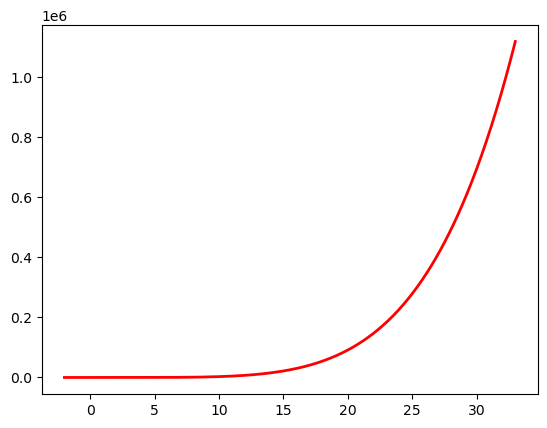

In [10]:
x_linspace = np.linspace(-2, 33, 1000)
# Evaluate the function q1 using the computed coefficients w_poly
y_values = q1(x_linspace, w_poly)

# Plot the results
plt.plot(x_linspace, y_values, 'r-', linewidth=2)
plt.show()

# Kernel Regression Closed Form

In [11]:
# Forming Kernel Matrix using Gaussian Kernel
def k(x_i, x_j, γ):
    norm_sq = (np.linalg.norm(x_i - x_j))**2
    kernel = math.e ** (-γ * norm_sq)
    return kernel

kernel_matrix = np.array([])
for x_i in X_sample:
    row = []
    for x_j in X_sample:
        k_x_x = k(x_i , x_j, 0.005)
        row.append(k_x_x)
    if len(kernel_matrix) == 0:
        kernel_matrix = np.array([row])
    else:
        kernel_matrix = np.vstack((kernel_matrix, row))

In [12]:
alpha = np.linalg.inv(np.dot(kernel_matrix.T,kernel_matrix)).dot(kernel_matrix.T.dot(y))

In [13]:
# Define the kernel regression function
def kernel_regression(x, X, alpha, gamma):
    y_pred = 0
    for i in range(X.shape[0]):
        kernel_val = k(x, X[i], gamma)
        y_pred += alpha[i] * kernel_val
    return y_pred

# Generate predictions for each point in x_linspace
y_pred = np.zeros_like(x_linspace)
for i, x in enumerate(x_linspace):
    y_pred[i] = kernel_regression(x, X_sample, alpha, 0.005)


/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_67365/2444859084.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)


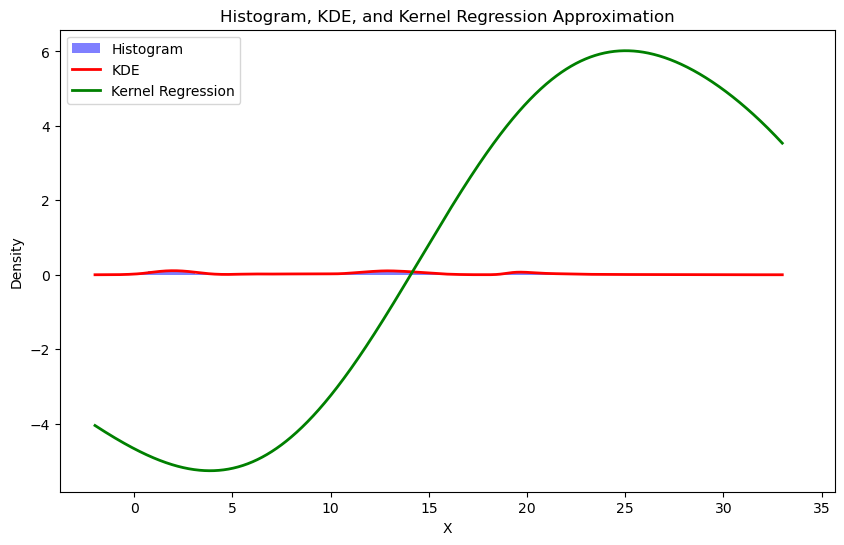

In [20]:

plt.figure(figsize=(10, 6))

# Plot histogram or KDE if available (you can adjust bins as per your data)
plt.hist(X, bins=30, density=True, alpha=0.5, color='b', label='Histogram')

# Plot KDE
plt.plot(x_linspace, compute_KDE(X, x_linspace), 'r-', linewidth=2, label='KDE')

# Plot kernel regression approximation
plt.plot(x_linspace, y_pred, 'g-', linewidth=2, label='Kernel Regression')

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Histogram, KDE, and Kernel Regression Approximation')
plt.legend()
plt.show()

# Kernel Ridge Regression Closed Form

In [16]:
λ = 0.01
kernel_ridge_y_pred = kernel_matrix.dot(np.linalg.inv(kernel_matrix + λ*np.eye(1000))).dot(y)

/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_67365/2444859084.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(subset_X)


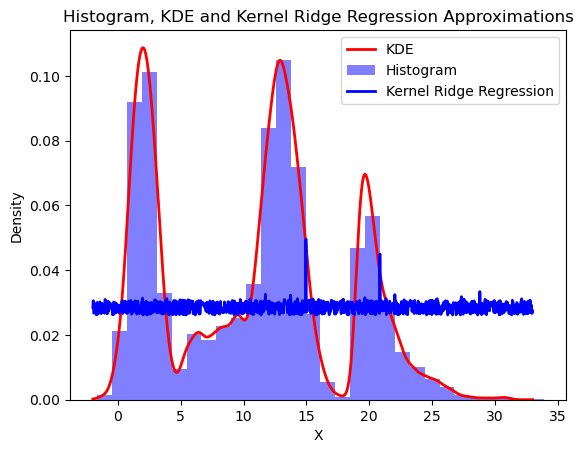

In [21]:
# Plot KDE
plt.plot(x_linspace, compute_KDE(X, x_linspace), 'r-', linewidth=2, label='KDE')

# Plot histogram or KDE if available (you can adjust bins as per your data)
plt.hist(X, bins=30, density=True, alpha=0.5, color='b', label='Histogram')
# Plot kernel ridge regression approximation
plt.plot(x_linspace, kernel_ridge_y_pred, 'b-', linewidth=2, label='Kernel Ridge Regression')

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Histogram, KDE and Kernel Ridge Regression Approximations')
plt.legend()
plt.show()